In [ ]:
!sudo apt-get install -y fonts-NanumBarunGothic
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package fonts-NanumBarunGothic
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#머신러닝에 필요한 기본 패키지 설치
!pip install geopandas
!pip install scipy
!pip install matplotlib
!pip install ipython
!pip install scikit-learn
!pip install pillow
!pip install wrapt
!pip install tensorflow==2.0.0
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 31.0 MB/s 
     |████████████████████████████████| 6.3 MB 56.5 MB/s 
     |████████████████████████████████| 16.7 MB 60.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 21.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/col

# **[Train Dataset]**

# 학습용 데이터 불러오기


*   250격자 고양시(0값 제거)
*   500격자 고양시(0값 제거)






In [ ]:
df = pd.read_csv('/content/500격자 고양시(0값 제거).csv',  encoding='UTF-8') 
#df = pd.drop([pd.columns[0]], axis=1)
df.head(10)

len(df)

908

In [ ]:
df= df.fillna(0)

결측치/결측값(missing value) 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_

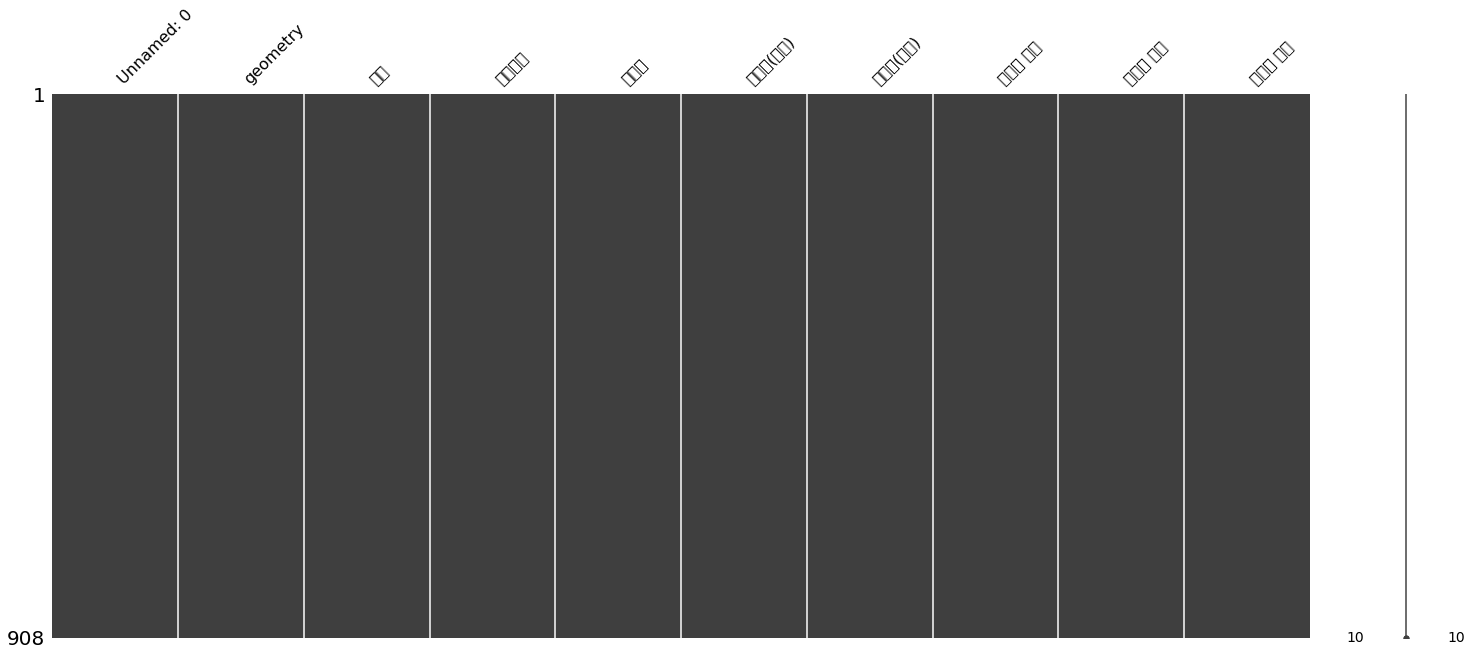

In [ ]:
import missingno as msno
msno.matrix(df)

#상관관계 확인


*   각 변수들끼리의 상관관계를 확인하고 시각화 해서 종속변수와 상관관계가 높은 변수들만 선택




In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")


In [ ]:
X = df.iloc[:, 2:8]
y = df.iloc[:, 9]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((635, 6), (273, 6), (635,), (273,))

In [ ]:
# matplotlib 한글 지원 폰트 설정
plt.rc('font',family = 'NanumBarunGothic')

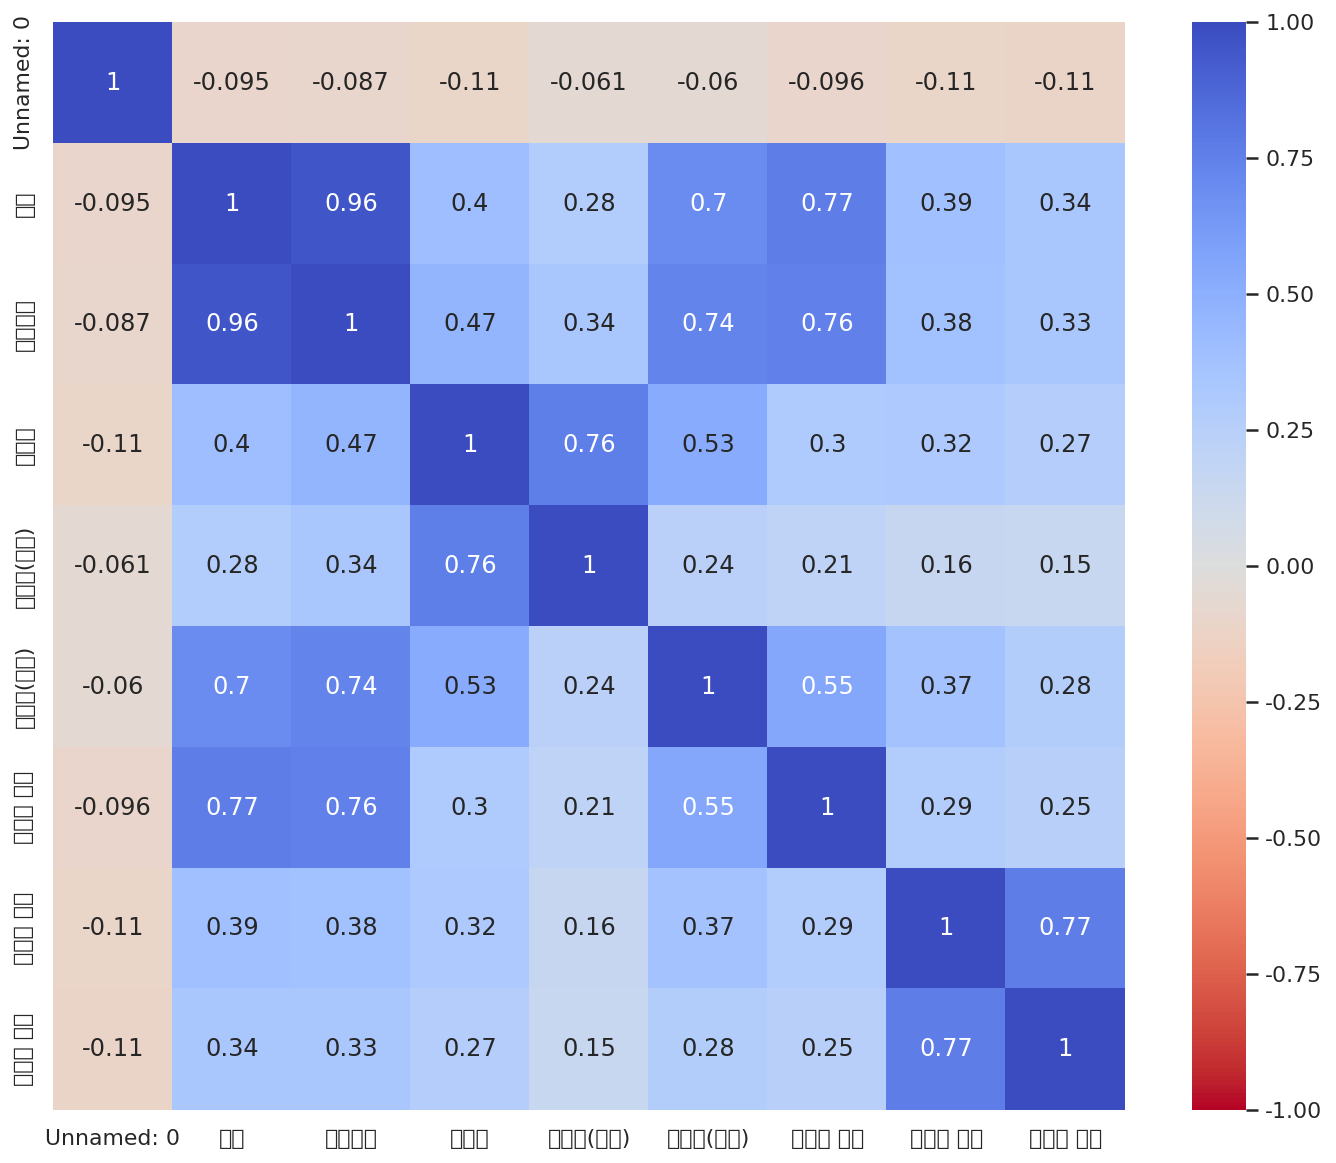

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm_r")

plt.show()

#Target = 정류장유무 지정



In [ ]:
target = df['정류장 유무']
df

,Unnamed: 0,geometry,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구,정류장 개수,정류장 유무
0,0,MULTIPOLYGON (((126.9557200734875 37.669764111...,0.0,0.0,3.0,2.0,0.0,0.000000,0.0,0.0
1,1,MULTIPOLYGON (((126.79740611435997 37.62386095...,66.0,17.0,4.0,1.0,0.0,1.094206,0.0,0.0
2,2,MULTIPOLYGON (((126.85367307377835 37.66924905...,29.0,14.0,17.0,9.0,0.0,0.996372,0.0,0.0
3,3,MULTIPOLYGON (((126.71728345831605 37.69996888...,39.0,8.0,104.0,11.0,0.0,1.415672,0.0,0.0
4,4,MULTIPOLYGON (((126.81419616079585 37.64649296...,0.0,0.0,6.0,1.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
903,1180,MULTIPOLYGON (((126.87710251157806 37.57924172...,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0
904,1182,MULTIPOLYGON (((126.89909963899531 37.66047595...,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0
905,1185,MULTIPOLYGON (((126.85883793268458 37.72786316...,0.0,0.0,2.0,0.0,0.0,0.000000,0.0,0.0
906,1201,MULTIPOLYGON (((126.80210163388575 37.72754092...,0.0,0.0,2.0,0.0,0.0,0.000000,0.0,0.0


Target 값 시각화

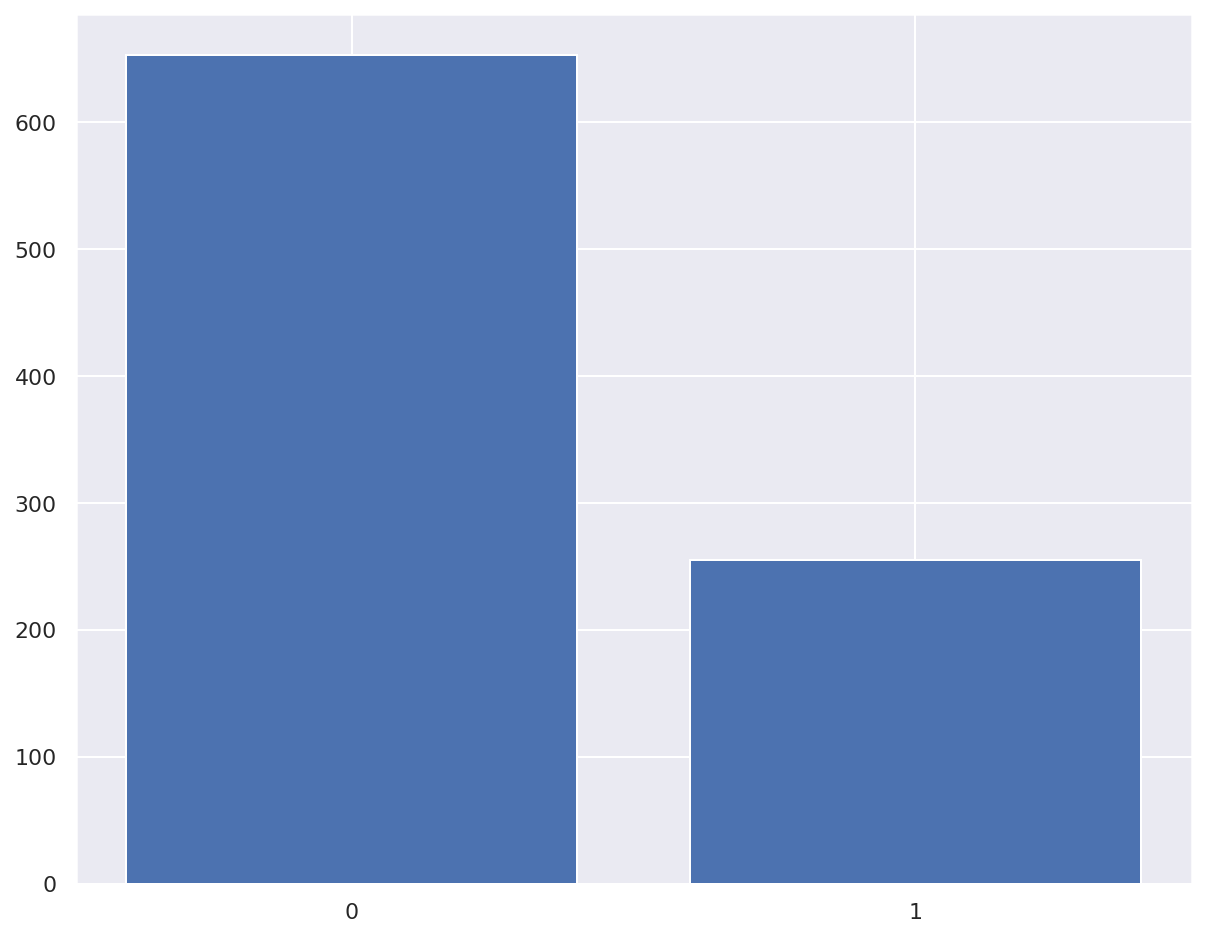

0.0    653
1.0    255
Name: 정류장 유무, dtype: int64


In [ ]:
plt.bar(target.unique(), target.value_counts())
plt.xticks([0, 1])
plt.show()
print(target.value_counts())

필요없는 컬럼값 제거

In [ ]:
df = df.drop(['geometry'], axis=1)
df = df.drop([df.columns[0]], axis=1)
df = df.drop(['정류장 유무'], axis =1)
df = df.drop(['정류장 개수'], axis =1)


df.head(5)

,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구
0,0.0,0.0,3.0,2.0,0.0,0.000000
1,66.0,17.0,4.0,1.0,0.0,1.094206
2,29.0,14.0,17.0,9.0,0.0,0.996372
3,39.0,8.0,104.0,11.0,0.0,1.415672
4,0.0,0.0,6.0,1.0,0.0,0.000000


# 분류모형의 Feature Importance


정규화(Feature Scaling)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[:] = scaler.fit_transform(df[:])

In [ ]:
df

,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구
0,0.000000,0.000000,0.005894,0.004124,0.0,0.000000
1,0.005780,0.008221,0.007859,0.002062,0.0,0.000701
2,0.002540,0.006770,0.033399,0.018557,0.0,0.000638
3,0.003415,0.003868,0.204322,0.022680,0.0,0.000907
4,0.000000,0.000000,0.011788,0.002062,0.0,0.000000
...,...,...,...,...,...,...
903,0.000000,0.000000,0.001965,0.000000,0.0,0.000000
904,0.000000,0.000000,0.001965,0.000000,0.0,0.000000
905,0.000000,0.000000,0.003929,0.000000,0.0,0.000000
906,0.000000,0.000000,0.003929,0.000000,0.0,0.000000


In [ ]:
from sklearn.model_selection import train_test_split

data_train = df
target_train = target


In [ ]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=20, random_state = 22)
rf_model.fit(data_train, target_train)


features = pd.DataFrame(data=np.c_[X.columns.values,rf_model.feature_importances_],
                        columns=["feature", "importance"])



features.sort_values(by="importance", ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)
features

,feature,importance
0,인구,0.229399
1,장애인 인구,0.199038
2,고령인구,0.191326
3,건물수,0.180604
4,건물수(단독),0.119527
5,건물수(공동),0.080106


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score




#DecisionTree Classifier

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


numNeighbors = list(range(1, 30))
trainF1 = []
#testF1 = []
for k in numNeighbors:
    clf = DecisionTreeClassifier(max_depth=k)
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    #Y_predTest = clf.predict(data_test)
    trainF1.append(f1_score(target_train, Y_predTrain, average='micro'))
    #testF1.append(f1_score(target_test, Y_predTest, average='micro'))
#plt.figure(figsize=(15, 6))
#plt.plot(numNeighbors, trainF1, 'ro-', numNeighbors, testF1, 'bv--')
#plt.legend(['Train F1', 'Test F1'])
#plt.xlabel('Number of Max_depth')
#plt.ylabel('F1 score')
#plt.show()
#print("best testF1 :", max(testF1))

#KNN

In [ ]:
#import matplotlib.pyplot as plt

numNeighbors = list(range(1, 30))
trainF1 = []
#testF1 = []
for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    #Y_predTest = clf.predict(data_test)
    trainF1.append(f1_score(target_train, Y_predTrain, average='micro'))
    #testF1.append(f1_score(target_test, Y_predTest, average='micro'))
#plt.figure(figsize=(15, 6))
#plt.plot(numNeighbors, trainF1, 'ro-', numNeighbors, testF1, 'bv--')
#plt.legend(['Train F1', 'Test F1'])
#plt.xlabel('Number of neighbors')
#plt.ylabel('F1 score')
#plt.show()
#print("best testF1 :", max(testF1))

#Ensemble

In [ ]:
from sklearn import ensemble

trainAcc = []
testAcc = []


X_train, Y_train = data_train, target_train

#RandomForest


In [ ]:
numBaseClassifiers = [10, 20, 50, 100, 200, 300, 500]
testF1 = []
bestf1 = []

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k)
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    #Y_predTest = clf.predict(data_test)
    #testF1.append(f1_score(target_test, Y_predTest, average='micro'))

#plt.figure(figsize=(15, 6))
#plt.plot(numBaseClassifiers, testF1, 'bv--')
#plt.xlabel('RandomForest')
#plt.ylabel('F1 score')

#bestf1.append(max(testF1))

#Bagging


In [ ]:
numBaseClassifiers = [100, 200, 300, 500]
max_depths = [2, 3, 5, 10, 20]
F1 = []

plt.figure(figsize=(15, 6))
for k in numBaseClassifiers:
    for maxdepth in max_depths:
        clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth), n_estimators=k)
        clf.fit(data_train, target_train)
        #Y_predTrain = clf.predict(data_train)
        #Y_predTest = clf.predict(data_test)
        #F1.append(f1_score(target_test, Y_predTest, average='micro'))
    #plt.plot(max_depths, F1)
    #testF1.append(max(F1))
    #F1 = []
    
#plt.legend(numBaseClassifiers)
#plt.xlabel('max_depth')
#plt.ylabel('F1 score')

#bestf1.append(max(testF1))

<Figure size 1080x432 with 0 Axes>

#Adaboost

In [ ]:
numBaseClassifiers = [50, 100, 200, 300, 500]
max_depths = [1, 2, 3, 5, 10, 20]
F1 = []
testF1 = []

plt.figure(figsize=(15, 6))
for k in numBaseClassifiers:
    for maxdepth in max_depths:
        clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth), n_estimators=k)
        clf.fit(data_train, target_train)
        #Y_predTrain = clf.predict(data_train)
        #Y_predTest = clf.predict(data_test)
        #F1.append(f1_score(target_test, Y_predTest, average='micro'))

    #plt.plot(max_depths, F1)
    #testF1.append(max(F1))
    #F1 = []

#plt.legend(numBaseClassifiers)
#plt.xlabel('max_depth')
#plt.ylabel('F1 score')

#bestf1.append(max(testF1))

<Figure size 1080x432 with 0 Axes>

# **[Test Dataset]**

# 테스트용 데이터 불러오기


*   250격자 세종시(0값 제거)
*   500격자 세종시(0값 제거)


In [ ]:
#데이터 불러오기
s_df = pd.read_csv('/content/500격자 세종시(0값 제거).csv',  encoding='UTF-8') 
s_df.head(10)
len(s_df)

1364

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_

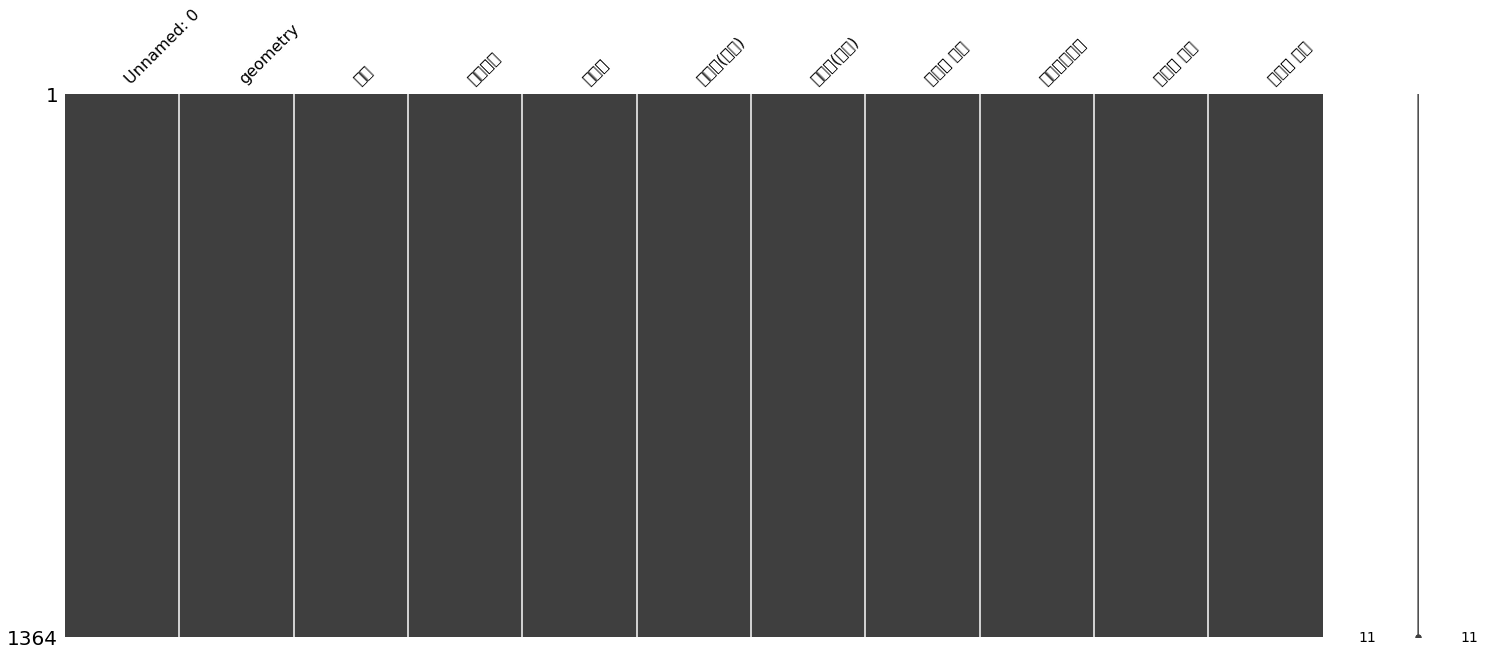

In [ ]:
import missingno as msno

msno.matrix(s_df)

#Target = 정류장 유무 지정



In [ ]:
S_target = s_df['정류장 유무']
s_df

,Unnamed: 0,geometry,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구,출발지도착지,정류장 개수,정류장 유무
0,0,MULTIPOLYGON (((127.31024156760803 36.47196453...,0.0,0.0,5.0,0.0,0.0,0.000000,0.0,0.0,0
1,1,MULTIPOLYGON (((127.28803984237655 36.42685092...,33.0,14.0,17.0,15.0,0.0,1.889858,0.0,0.0,0
2,2,MULTIPOLYGON (((127.24341702045801 36.42676337...,22.0,7.0,14.0,14.0,0.0,1.259905,0.0,0.0,0
3,3,MULTIPOLYGON (((127.20892029233768 36.70164351...,107.0,15.0,32.0,3.0,12.0,10.654835,0.0,0.0,0
4,4,MULTIPOLYGON (((127.24873316042621 36.50791159...,3096.0,182.0,45.0,7.0,27.0,66.289725,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1359,2002,MULTIPOLYGON (((127.29337856784913 36.51701242...,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0
1360,2011,MULTIPOLYGON (((127.20959711170893 36.52134544...,0.0,0.0,4.0,4.0,0.0,0.000000,0.0,0.0,0
1361,2017,MULTIPOLYGON (((127.27628777863785 36.63417730...,0.0,0.0,3.0,0.0,0.0,0.000000,0.0,0.0,0
1362,2018,MULTIPOLYGON (((127.1813225522552 36.606916239...,0.0,0.0,9.0,0.0,0.0,0.000000,0.0,0.0,0


Test target 결과값 시각화

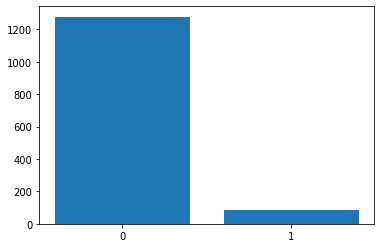

0    1278
1      86
Name: 정류장 유무, dtype: int64


In [ ]:
plt.bar(target_test.unique(), target_test.value_counts())
plt.xticks([0, 1])
plt.show()
print(target_test.value_counts())

In [ ]:
s_df.columns

Index(['Unnamed: 0', 'geometry', '인구', '고령인구', '건물수', '건물수(단독)', '건물수(공동)',
       '장애인 인구', '출발지도착지', '정류장 개수', '정류장 유무'],
      dtype='object')

필요없는 column값 제거

In [ ]:
s_df = s_df.drop(['geometry'], axis=1)
s_df = s_df.drop(['Unnamed: 0'], axis=1)
s_df = s_df.drop(['정류장 유무'], axis =1)
s_df = s_df.drop(['정류장 개수'], axis =1)
s_df = s_df.drop(['출발지도착지'], axis =1)


s_df.head(5)

,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구
0,0.0,0.0,5.0,0.0,0.0,0.000000
1,33.0,14.0,17.0,15.0,0.0,1.889858
2,22.0,7.0,14.0,14.0,0.0,1.259905
3,107.0,15.0,32.0,3.0,12.0,10.654835
4,3096.0,182.0,45.0,7.0,27.0,66.289725


정규화(Feature Scaling)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
s_df[:] = scaler.fit_transform(s_df[:])

In [ ]:
s_df

,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구
0,0.000000,0.000000,0.007246,0.000000,0.000000,0.000000
1,0.004079,0.016073,0.024638,0.047468,0.000000,0.005650
2,0.002719,0.008037,0.020290,0.044304,0.000000,0.003766
3,0.013225,0.017222,0.046377,0.009494,0.107143,0.031853
4,0.382647,0.208955,0.065217,0.022152,0.241071,0.198173
...,...,...,...,...,...,...
1359,0.000000,0.000000,0.001449,0.000000,0.000000,0.000000
1360,0.000000,0.000000,0.005797,0.012658,0.000000,0.000000
1361,0.000000,0.000000,0.004348,0.000000,0.000000,0.000000
1362,0.000000,0.000000,0.013043,0.000000,0.000000,0.000000


In [ ]:
data_test = s_df
target_test = S_target

SMOTE 적용

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
data_train_over,target_train_over = smote.fit_resample(data_train,target_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', data_train.shape, target_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', data_train_over.shape, target_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(target_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (908, 6) (908,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (1306, 6) (1306,)
SMOTE 적용 후 레이블 값 분포: 
 0.0    653
1.0    653
Name: 정류장 유무, dtype: int64


#DecisionTree Classifier

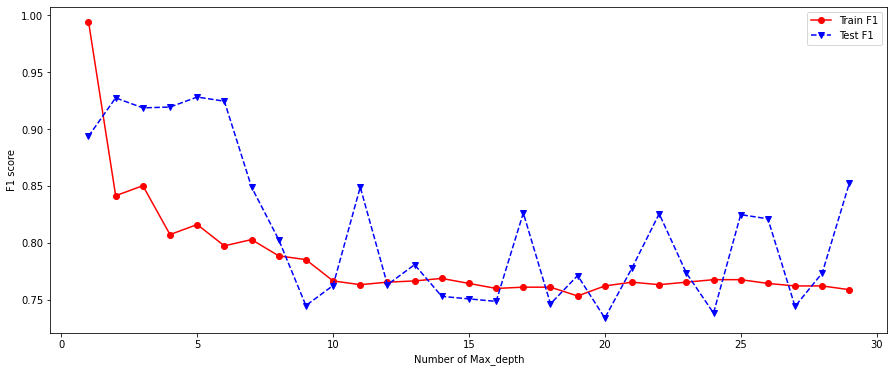

best testF1 : 0.9281524926686217


In [ ]:
numNeighbors = list(range(1, 30))
#trainF1 = []
testF1 = []
for k in numNeighbors:
    clf = DecisionTreeClassifier(max_depth=k)
    clf.fit(data_train, target_train)
    #Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    #trainF1.append(f1_score(target_train, Y_predTrain, average='micro'))
    testF1.append(f1_score(target_test, Y_predTest, average='micro'))
plt.figure(figsize=(15, 6))
plt.plot(numNeighbors, trainF1, 'ro-', numNeighbors, testF1, 'bv--')
plt.legend(['Train F1', 'Test F1'])
plt.xlabel('Number of Max_depth')
plt.ylabel('F1 score')
plt.show()
print("best testF1 :", max(testF1))

In [ ]:
# 예측
preds = clf.predict(data_test)
pred_proba = clf.predict_proba(data_test)[:,1]

# 평가
get_clf_eval(target_test, preds, pred_proba)

오차 행렬
[[1142  136]
 [  65   21]]
정확도: 0.8526, 정밀도: 0.1338, 재현율: 0.2442, F1: 0.1728, AUC: 0.5597


#KNN

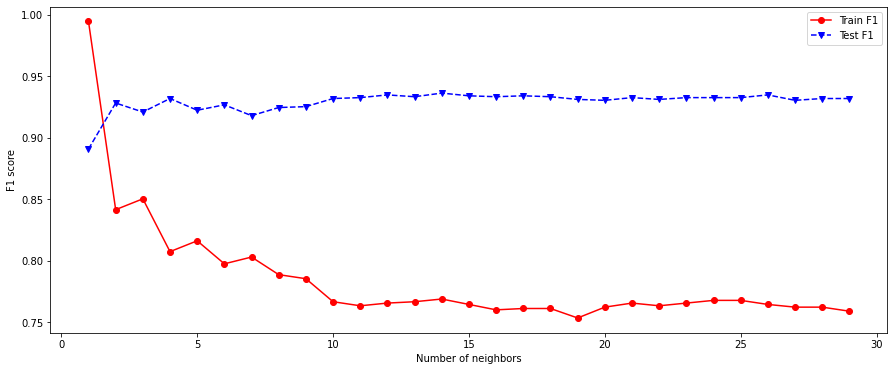

best testF1 : 0.9362170087976539


In [ ]:
import matplotlib.pyplot as plt

numNeighbors = list(range(1, 30))
#trainF1 = []
testF1 = []
for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(data_train, target_train)
    #Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    #trainF1.append(f1_score(target_train, Y_predTrain, average='micro'))
    testF1.append(f1_score(target_test, Y_predTest, average='micro'))
plt.figure(figsize=(15, 6))
plt.plot(numNeighbors, trainF1, 'ro-', numNeighbors, testF1, 'bv--')
plt.legend(['Train F1', 'Test F1'])
plt.xlabel('Number of neighbors')
plt.ylabel('F1 score')
plt.show()
print("best testF1 :", max(testF1))

In [ ]:
# 예측
preds = clf.predict(data_test)
pred_proba = clf.predict_proba(data_test)[:,1]

# 평가
get_clf_eval(target_test, preds, pred_proba)

오차 행렬
[[1243   35]
 [  58   28]]
정확도: 0.9318, 정밀도: 0.4444, 재현율: 0.3256, F1: 0.3758, AUC: 0.8051


#Ensemble

In [ ]:
from sklearn import ensemble

trainAcc = []
testAcc = []

X_test, Y_test = data_test, target_test

#*RandomForest* 

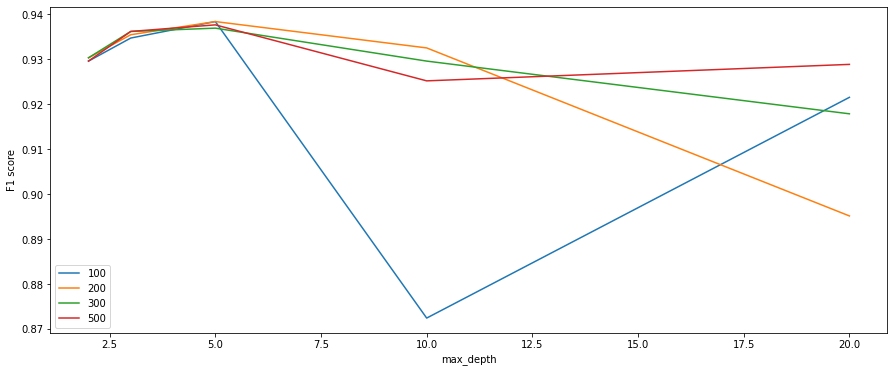

In [ ]:
numBaseClassifiers = [10, 20, 50, 100, 200, 300, 500]
testF1 = []
bestf1 = []

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k)
    clf.fit(data_train, target_train)
    #Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    testF1.append(f1_score(target_test, Y_predTest, average='micro'))

plt.figure(figsize=(15, 6))
plt.plot(numBaseClassifiers, testF1, 'bv--')
plt.xlabel('RandomForest')
plt.ylabel('F1 score')

bestf1.append(max(testF1))

In [ ]:
# 예측
preds = clf.predict(data_test)
pred_proba = clf.predict_proba(data_test)[:,1]

# 평가
get_clf_eval(target_test, preds, pred_proba)

오차 행렬
[[1254   24]
 [  73   13]]
정확도: 0.9289, 정밀도: 0.3514, 재현율: 0.1512, F1: 0.2114, AUC: 0.7082


#Bagging

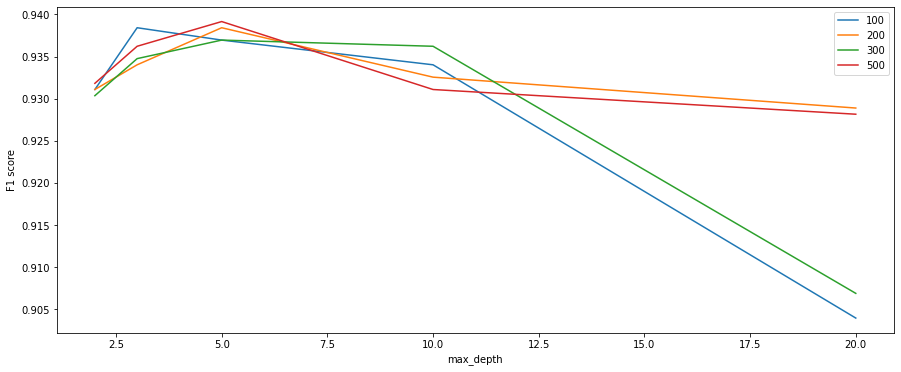

In [ ]:
numBaseClassifiers = [100, 200, 300, 500]
max_depths = [2, 3, 5, 10, 20]
F1 = []

plt.figure(figsize=(15, 6))
for k in numBaseClassifiers:
    for maxdepth in max_depths:
        clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth), n_estimators=k)
        clf.fit(data_train, target_train)
        #Y_predTrain = clf.predict(data_train)
        Y_predTest = clf.predict(data_test)
        F1.append(f1_score(target_test, Y_predTest, average='micro'))
    plt.plot(max_depths, F1)
    testF1.append(max(F1))
    F1 = []
    
plt.legend(numBaseClassifiers)
plt.xlabel('max_depth')
plt.ylabel('F1 score')

bestf1.append(max(testF1))

In [ ]:
# 예측
preds = clf.predict(data_test)
pred_proba = clf.predict_proba(data_test)[:,1]

# 평가
get_clf_eval(target_test, preds, pred_proba)

오차 행렬
[[1253   25]
 [  73   13]]
정확도: 0.9282, 정밀도: 0.3421, 재현율: 0.1512, F1: 0.2097, AUC: 0.7129


#Adaboost 

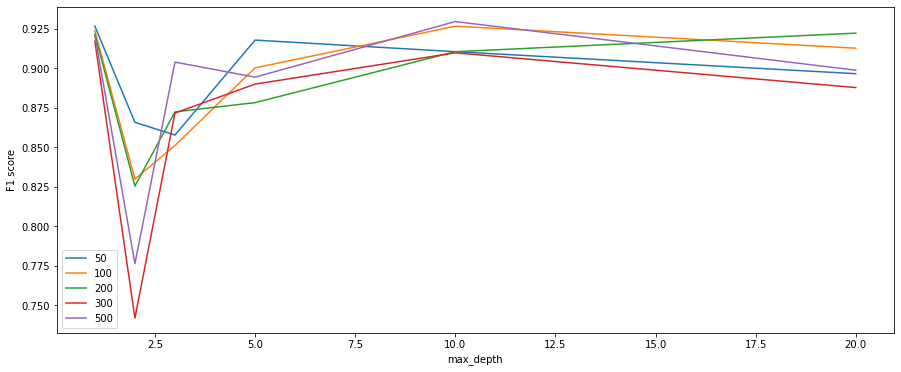

In [ ]:
numBaseClassifiers = [50, 100, 200, 300, 500]
max_depths = [1, 2, 3, 5, 10, 20]
F1 = []
testF1 = []

plt.figure(figsize=(15, 6))
for k in numBaseClassifiers:
    for maxdepth in max_depths:
        clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth), n_estimators=k)
        clf.fit(data_train, target_train)
        #Y_predTrain = clf.predict(data_train)
        Y_predTest = clf.predict(data_test)
        F1.append(f1_score(target_test, Y_predTest, average='micro'))

    plt.plot(max_depths, F1)
    testF1.append(max(F1))
    F1 = []

plt.legend(numBaseClassifiers)
plt.xlabel('max_depth')
plt.ylabel('F1 score')

bestf1.append(max(testF1))

In [ ]:
# 예측
preds = clf.predict(data_test)
pred_proba = clf.predict_proba(data_test)[:,1]

# 평가
get_clf_eval(target_test, preds, pred_proba)


오차 행렬
[[1208   70]
 [  68   18]]
정확도: 0.8988, 정밀도: 0.2045, 재현율: 0.2093, F1: 0.2069, AUC: 0.6461
